In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data=pd.read_csv("data.csv")

In [60]:
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,...,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,1.010000e+11,8.941719e+10,5.837598e+10,NaN


In [61]:
data.info(),data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            154 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            168 non-null    float64
 15  1971            171 non-null    float64
 16  1972            171 non-null    float64
 17  1973            171 non-null    flo

(None,
 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
        '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
        '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
        '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
        '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
        '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
       dtype='object'))

In [62]:
data.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              134
                 ... 
2017               10
2018               10
2019               13
2020               24
2021              266
Length: 66, dtype: int64

In [63]:
# Remove the useless columns
data_names=pd.DataFrame(data["Country Name"])
data.drop("Country Name" ,axis=1,inplace=True)
data.drop("Country Code",axis=1,inplace=True)
data.drop("Indicator Name",axis=1,inplace=True)
data.drop("Indicator Code",axis=1,inplace=True)
data.drop("2021",axis=1,inplace=True)

In [64]:
data.head(5)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,3.031384e+10,3.137555e+10,3.418718e+10,3.924842e+10,...,9.430000e+11,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11
2,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,1.488035e+10,1.688209e+10,...,6.710000e+11,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,1.010000e+11,8.941719e+10,5.837598e+10


In [65]:
# Let's destroy the missing values
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if data[label].isnull().sum():
            print(label)

1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [66]:
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if data[label].isnull().sum():
            # Add a binary column which tells us if teh data was missing or not
            data[label+"_is_missing"]=pd.isnull(content)
            # Fill missing numeric values with median values
            data[label]=content.fillna(content.median())
            # Median is more robust than mean

In [67]:
# No more missing in numerical values
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if data[label].isnull().sum():
            print(label)

In [68]:
data.isna().sum()

1960               0
1961               0
1962               0
1963               0
1964               0
                  ..
2016_is_missing    0
2017_is_missing    0
2018_is_missing    0
2019_is_missing    0
2020_is_missing    0
Length: 122, dtype: int64

In [69]:
data.head().T

,0,1,2,3,4
1960,2.97697e+09,2.00827e+10,5.37778e+08,1.04043e+10,2.97697e+09
1961,2.96685e+09,2.05095e+10,5.48889e+08,1.11281e+10,2.96685e+09
1962,2.81432e+09,2.23504e+10,5.46667e+08,1.19434e+10,2.81432e+09
1963,3.5404e+09,2.67587e+10,7.51111e+08,1.26765e+10,3.5404e+09
1964,3.40533e+09,2.4465e+10,8e+08,1.38386e+10,3.40533e+09
...,...,...,...,...,...
2016_is_missing,False,False,False,False,False
2017_is_missing,False,False,False,False,False
2018_is_missing,False,False,False,False,False
2019_is_missing,True,False,False,False,False


<AxesSubplot:>

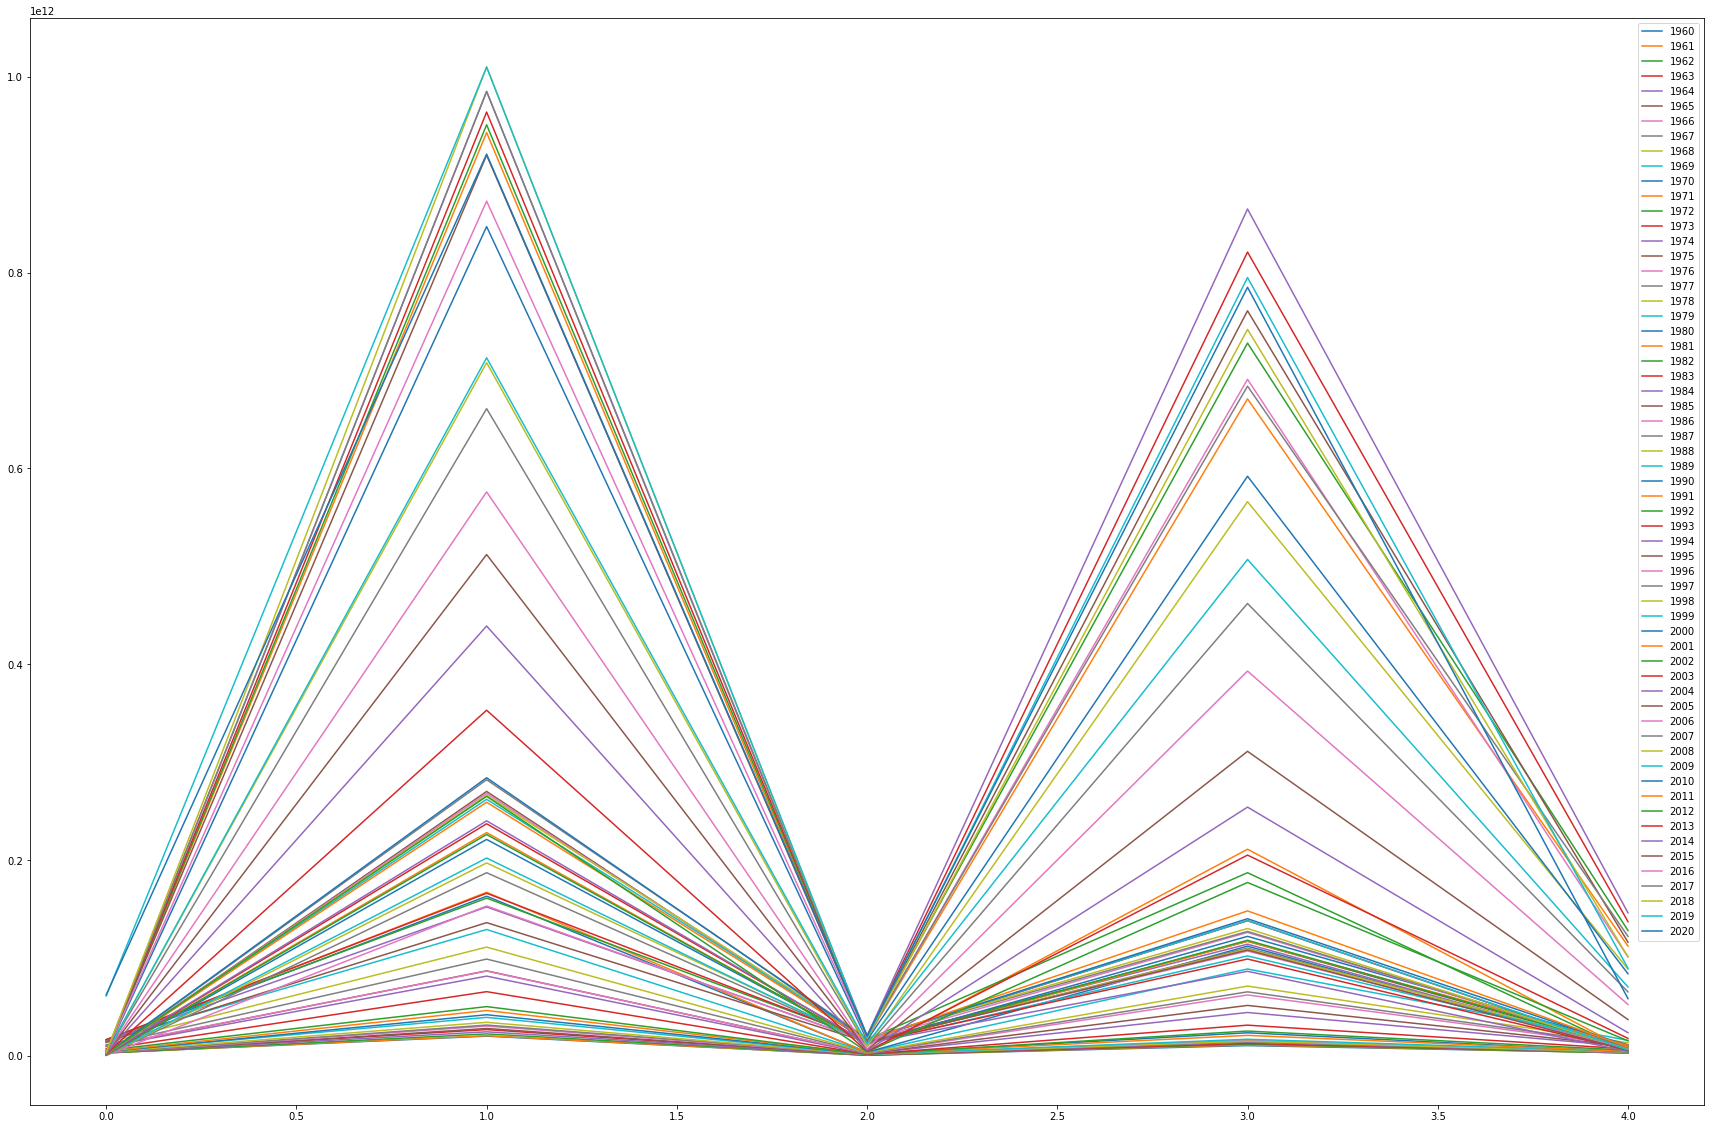

In [70]:
data.head(5).plot(figsize=(30,20))

In [71]:
# Splitting Data into test and train sets
train=data.copy() 
data_test=data["2020"]
data_train=train.drop("2020",axis=1)
data_train=train.drop("2020_is_missing",axis=1)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model=RandomForestRegressor(n_jobs=-1,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(data_train,data_test,test_size=0.2)

model_grids={"n_estimators":np.arange(10,100,10),
"max_depth":[None,3,5,10],
"min_samples_split":np.arange(2,20,2),
"min_samples_leaf":np.arange(1,20,2),
"max_features":[0.5,1,"sqrt","auto"],
}

model=RandomizedSearchCV(model,param_distributions=model_grids,n_iter=120,
cv=5,verbose=True)

model.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=120,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [80]:
model.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [81]:
ideal_model=RandomForestRegressor(n_estimators= 10,
 min_samples_split= 2,
 min_samples_leaf=1,
 max_features= 'auto',
 max_depth=10,
 random_state=42)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [82]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
from sklearn.metrics import r2_score
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds=model.predict(X_test)
    scores={"Training MAE ": mean_absolute_error(y_train,train_preds),
             "Test MAE ": mean_absolute_error(y_test,val_preds),             
            "Training R^2":r2_score( y_train,train_preds),
            "Test R^2 ":r2_score(y_test,val_preds) } 
    return scores 

In [83]:
show_scores(ideal_model)

{'Training MAE ': 105229008062.13315,
 'Test MAE ': 145297227493.337,
 'Training R^2': 0.9981644557785748,
 'Test R^2 ': 0.943318462590719}

In [84]:
y_preds=ideal_model.predict(X_test)
comparison_dataframe=pd.DataFrame({"Actual Value :":y_test,"Predicted Value :":y_preds})
comparison_dataframe.sort_index(inplace=True)
comparison_dataframe.head(10)

,Actual Value :,Predicted Value :
3,7.850000e+11,7.634000e+11
21,6.988935e+10,7.165459e+10
25,6.025824e+10,6.251496e+10
34,2.380088e+09,2.004015e+09
37,7.520000e+11,8.013000e+11
44,1.018712e+10,9.998510e+09
46,1.235400e+09,9.557242e+08
51,2.595822e+09,3.423884e+09
58,3.560000e+11,3.432000e+11
62,1.070000e+13,1.456600e+13


In [85]:
import pickle
with open('best_model.pkl','wb') as f:
    pickle.dump(ideal_model,f)

In [92]:
comparison_dataframe["Country Name"]=data_names
comparison_dataframe.tail(10)

,Actual Value :,Predicted Value :,Country Name
227,6.212830e+10,7.652414e+10,Syrian Arab Republic
228,9.245830e+08,6.933021e+08,Turks and Caicos Islands
230,1.740000e+13,1.464600e+13,East Asia & Pacific (IDA & IBRD countries)
238,1.180000e+12,1.367000e+12,Middle East & North Africa (IDA & IBRD countries)
241,1.710000e+12,1.706000e+12,Sub-Saharan Africa (IDA & IBRD countries)
242,2.158804e+10,2.238145e+10,Trinidad and Tobago
243,4.162035e+10,4.537684e+10,Tunisia
252,5.992995e+10,6.482525e+10,Uzbekistan
257,2.710000e+11,2.398000e+11,Vietnam
262,6.212830e+10,6.212386e+10,"Yemen, Rep."
